In [1]:
import string
import random as rnd
import matplotlib.pyplot as plt
import time
import math
from scipy.optimize import curve_fit
import numpy as np

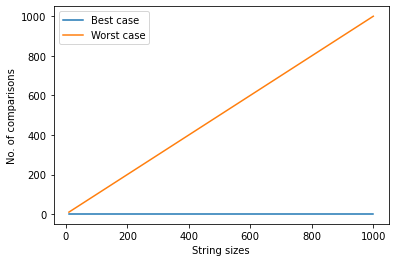

In [28]:
#PART 1
def string_matcher(str1,str2):
    comps=0  # Stores the number of comparisons made, this is the factor we evaluate to analyse complexity
    if(len(str1)!=len(str2)):
        return False,comps
    m=len(str1)
    is_matching=True
    for i in range(m):
        comps+=1
        if(str1[i]!=str2[i]):
            is_matching=False
            return is_matching,comps
    return is_matching,comps
#####################################################################
str_sizes=[]
unit=10
best_cases=[]
worst_cases=[]
for i in range(int(1000/unit)):
    str_sizes.append(unit*(i+1))
for m in str_sizes:
    strn=''.join(rnd.choices(string.ascii_letters, k = m))
    
     #Best case is when mismatch occurs in the first character itself
    test_strn=strn.swapcase()
    match,comps=string_matcher(strn,test_strn)
    best_cases.append(comps)
    
     #Worst case is when there is no mismatch
    test_strn=strn
    match,comps=string_matcher(strn,test_strn)
    worst_cases.append(comps)
####################################################################
p1=plt.plot(str_sizes,best_cases)
p2=plt.plot(str_sizes,worst_cases)
plt.xlabel("String sizes")
plt.ylabel("No. of comparisons")
plt.legend(["Best case","Worst case"])    

Text(0.5, 1.0, 'Runtimes vs n (m=n/2)')

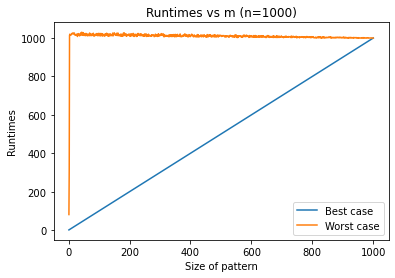

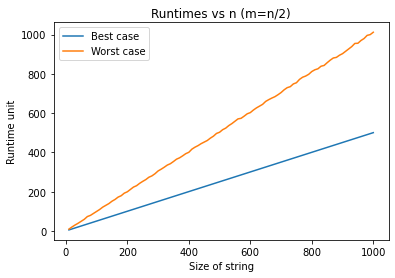

In [29]:
# PART 2 Naive String Matching Algorithm
def string_matcher(str1,str2):
    comps=0
    if(len(str1)!=len(str2)):
        return False,comps
    m=len(str1)
    is_matching=True
    for i in range(m):
        comps+=1
        if(str1[i]!=str2[i]):
            is_matching=False
            return is_matching,comps
    return is_matching,comps

def match(strn,pattern):
    cmp=0
    got_match=False
    n=len(strn)
    m=len(pattern)
    for i in range(n-m+1):
        test_strn=strn[i:i+m:1]
        got_match,c=string_matcher(test_strn,pattern)
        cmp+=c
        if(got_match==True):
            return got_match,cmp
    return got_match,cmp

#############################################################################################
strn_sizes=[]
best_times=[]
worst_times=[]
unit=10
for i in range(int(1000/unit)):
    strn_sizes.append(unit*(i+1))
for n in strn_sizes:
    strn=''.join(rnd.choices(string.ascii_letters, k = n))
    patt_sizes=[]
    n_bt=[] #Holds the best runtimes for range of values of m for a given string 'strn' and given 'n'
    n_wt=[] #Holds the worst runtimes for the same
    for i in range(n):
        patt_sizes.append(i+1)
    for m in patt_sizes:
         #Best case is when the pattern is present right in the beginning of the string
        patt=strn[0:m:1] #Setting the first m characters as the pattern
        #srt=time.time()
        matchs,comps=match(strn,patt)
        #end=time.time()
        n_bt.append(comps)
        
         #Worst case is when the pattern is present in the end of the string
        patt=strn[n-m:n:1] # Setting the last m characters as the pattern
        #srt=time.time()
        matchs,comps=match(strn,patt)
        #end=time.time()
        n_wt.append(comps)
    
    best_times.append(n_bt)
    worst_times.append(n_wt)

#############################################################################################
"""We will now plot the runtimes(best and worst case) of the algorithm for a fixed value of 'n' 
but a varying value of 'm'. The selected value of n=100."""

ns=1000
m_axis=[]
for i in range(ns):
    m_axis.append(i+1)

p1=plt.figure(1)
plt.plot(m_axis,n_bt)
plt.plot(m_axis,n_wt)
plt.xlabel("Size of pattern")
plt.ylabel("Runtimes")
plt.legend(["Best case","Worst case"])
plt.title("Runtimes vs m (n=1000)")

##############################################################################################
"""We will now plot the runtimes(best and worst) for a fixed value of m=n/2 as n varies"""

r_axis_best=[]
r_axis_worst=[]
for i in range(len(strn_sizes)):
    n=strn_sizes[i]
    m=int(n/2)
    r_axis_best.append(best_times[i][m])
    r_axis_worst.append(worst_times[i][m])

p2=plt.figure(2)
plt.plot(strn_sizes,r_axis_best)
plt.plot(strn_sizes,r_axis_worst)
plt.xlabel("Size of string")
plt.ylabel("Runtime unit")
plt.legend(["Best case","Worst case"])
plt.title("Runtimes vs n (m=n/2)")
        
        



Text(0.5, 1.0, 'Runtime vs n (m=n/2)')

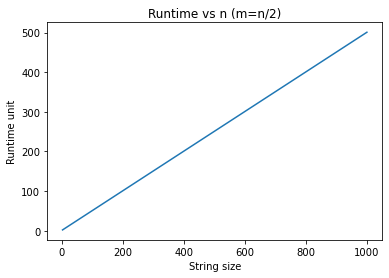

In [38]:
#PART 3 (Treating p and t_s as numbers)
def match_num_method(strn,pattern):
    comps=0
    n=len(strn)
    m=len(pattern)
    num_p=int(pattern)
    for i in range(n-m+1):
        t_i=int(strn[i:i+m:1])
        comps+=1
        if(num_p==t_i):
            return True,comps
    return False,comps
strn_sizes=[]
unit=2
for i in range(int(1000/unit)):
    strn_sizes.append(unit*(i+1))

times=[]
for n in strn_sizes:
    strn=''.join(rnd.choices(string.digits, k = n))
    #print(strn)
    pattern=strn[int(n/2):n:1]
    #print(pattern)
    got_match,comps=match_num_method(strn,pattern)
    #print(got_match)
    times.append(comps)

    
plt.plot(strn_sizes,times)
plt.xlabel("String size")
plt.ylabel("Runtime unit")
plt.title("Runtime vs n (m=n/2)")
    

Text(0.5, 1.0, 'Runtime vs n (m=n/2)')

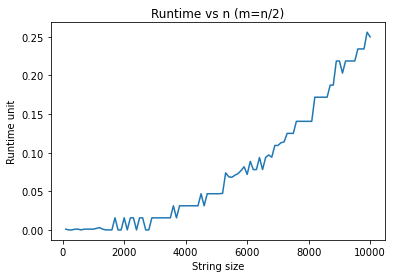

In [81]:
#PART 4 (Using modulo)
def numify_horner(strn):
    l=len(strn)
    num=0
    for i in range(l):
        num*=10
        num+=int(strn[i])
    return num

def modulo_compare(a,b,p):
    if(a%p!=b%p):
        return False
    elif(a==b):
        return True
    return False

def matcher(strn,pattern):
    start=time.time()
    n=len(strn)
    m=len(pattern)
    num_pattern=numify_horner(pattern)
    t_i=numify_horner(strn[0:m:1])
    for i in range(n-m+1):
        t_i=(t_i*10)-(int(strn[i])*pow(10,m))+int(strn[i+m-1])
        p=8951
        got_match=modulo_compare(t_i,num_pattern,p)
        if(got_match):
            return True,time.time()-start
    return False,time.time()-start

strn_sizes=[]
unit=100
for i in range(int(10000/unit)):
    strn_sizes.append(unit*(i+1))

times=[]
for n in strn_sizes:
    strn=''.join(rnd.choices(string.digits, k = n))
    #print(strn)
    pattern=strn[int(n/2):n:1]
    #print(pattern)
    got_match,comps=matcher(strn,pattern)
    #print(got_match)
    times.append(comps)

    
plt.plot(strn_sizes,times)
plt.xlabel("String size")
plt.ylabel("Runtime unit")
plt.title("Runtime vs n (m=n/2)")
    

String - 85020052806708387373410506747387220252664473404173647874367378263262220335647371828007416332115274264384513287151082216316555456012200783450015572184170518242877706077164442843078361014672351814626753024431822453627456882300638473020065338527634682020801567847105405534853316150706625646130323051771867537608182204040310563704525873284108620416776672726712587648856355710104775484273878338205525580778734116161115738086884441617855150155672477553560502384420453145868063771364747223745611876451218701336532867825743076516114174204663884166467600650272842787746521461000851850826077682188242672767137070063433687360233846320834128031354344018100451663831284233745177121718382585365673002818018250526478115738117137315654867768501173154270257722820145443218465121150421456274805825705700850534816103482526688114446732156685560886561450603402244522717741257033373612038150540282165474026205430214451630466335520503662685627163575388124511702583688351722384041185431852415344018242327141371020511530751875176612026488212755053231868287825226034617084808687134515567635011527478607434235332406352282872851587846872005073364054372435653368404538556334433627617388211700888674471628306658688342428661346413775463811124113336276381680427062533888344215440258545707017042782557151343280507508633122322420754732544360380200751823541871586085726781520535137147070780077660088776233046330622581333224727637451347353228778432887807253058314355265888350263678780718811451506628776832718088548358632488551720111305365654236602824662141251035473335054766435015631362072820780774686062008365806082613644504562416184710584073431784151332167374077115184260464027208686328654103733155522563313345440223560075410137383421813017311124274187606533424013221833205202074083424834445552867332517021538405355457325262154366673727273078634182878056550685353107164878874552462784132118136787188407416732432040058074043100741211228375138511625751230247721182711057032757845452750730338626481341236520828831810421568847163716065365051470803615221726763765762282051464075646427485027875258428513533364752554184775451250164737517521735664432217748180068816866112080166723405843546213601401834586030700274634256275215556837585444125374424464512304337072218038252048265183828884165653712788077504554034438062640550571473700771726441560624323880538081426705506830643756405818865640016001780383318322672226207028874833380405883511030273768007354811425300172855465174375223543340780571276013718102533725582160830471023475681604431683036014514452857886601441636053105403254167622435616855128630234035206088628768616175103338542265834712468027012383272850120047661001411344087808277730331880744405421164345725837421262177003242146345744682123048611134475532404184482010527602643137257778386451076681122721541408866386016682403057687645222112856864728101241400601675763066376421856742676786565037453372881132220142433813446668671352275147656087040567741828518707563430832844488047860141381325810611320173067533605370250378458103485510212854375015358253448637317031806431102461434824182603581380245120320021254032570832736702341186684478082066127410431257566643378046134772655113240442372016811776776748538016434702076858326242162186173820520782814834560245000802335244204533162741325301704877041452181335081575661245567740674846526537517871817433072572127483512328482622328761358255843746540370527646504230513563001371340168054771240544432655000483102500875635408284087854877270201105351077553840453388560308620560482447012631236162616711723611341236661601535130260452332733703372180638531546861042761145616025153811227404384374454718023715328774603667373255731052330736585701777778811536680856073268606354074752676708020845888144038784124628401401172067177003155133382224333345631745403720540646277480370347727155877842362061666340557186315802240507800736501105255455613374746432417316501873108812802027300216031627710478025785637420345613654237512442834041116018526333560252425548048386077858288225665620711135216836465364741681726467305386380820088371816622137125750413871417721841083633424112678242845287323035883888504364720302317154483337551024020342511264770638042571280647531171007786157662600837227330863322033271436405824540412838357608501551853256770316302628706423040335666173628700573427362105555882033200884322037822081646844437586256025554371427712712843156632560083865780385660122526481440541447523180248002767746410111774714882627786705434053342401817753062326488333623555853344616380511515186434525182501262014628826327642818236551057405127686648712744781611410328303686068516774645223764255723414703155562802286811134481356108421756210717065846536312684214118511148216776466066424285127885003567738358053246216448776155805442213861311187506760536803521717481026553583523885108472514248233053612060163772734254228487230067326824577015425107377107542447571820041324343237726122807206146318372874730481454575071602378027050447741481255330471076082818555741753412654536064211036202744546841381783441352703511142130282338323166

Pattern - 2575123024772118271105703275784545275073033862648134123652082883181042156884716371606536505147080361


In [ ]:
#PART 4 (Using modulo)
def matcher_mod(strn,pattern,p):
    start=time.time()
    n=len(strn)
    m=len(pattern)
    num_pattern=int(pattern)
    for i in range(n-m+1):
        t_i=int(strn[i:i+m:1])
        if(t_i%p==num_pattern%p):
            if(t_i==num_pattern):
                got_match=True
            else:
                got_match=False
        else:
            got_match=False
        if(got_match):
            return True,time.time()-start
    return False,time.time()-start

def matcher(strn,pattern):
    start=time.time()
    n=len(strn)
    m=len(pattern)
    num_pattern=int(pattern)
    for i in range(n-m+1):
        t_i=int(strn[i:i+m:1])
        got_match=(t_i==num_pattern)
        if(got_match):
            return True,time.time()-start
    return False,time.time()-start

strn=input("Enter the string:")
pattern=input("Enter the pattern:")
print("Without using modulo")
print(matcher(strn,pattern))
print("With using modulo")
print(matcher_mod(strn,pattern,8951))